## THE IRIS DATASET

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id

- SepalLengthCm

- SepalWidthCm

- PetalLengthCm

- PetalWidthCm
- Species

#### IMPORTING LIBRARIES

First, let’s import all of the modules, functions and objects we are going to use

In [119]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
#current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

#### LOADING THE DATA

We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

In this step we are going to load the iris data from CSV file URL.

In [106]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)


#### SUMMARIZING THE DATASET

##### 1. Dimensions of the dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [107]:
# shape
print(dataset.shape)

(150, 5)


*The dataset has 150 instances and 5 variables.*

##### 2. Peek at the Data

It is also always a good idea to actually eyeball your data.

In [108]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

*Here, we can see the first 20 rows of the data.*

##### 3. Statistical Summary
Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [109]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


*We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.*

##### 4. Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [110]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


*We can see that each class has the same number of instances (50 or 33% of the dataset).*

#### DATA VISULAIZATION
We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.


##### 1. Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create **box and whisker plots** of each.

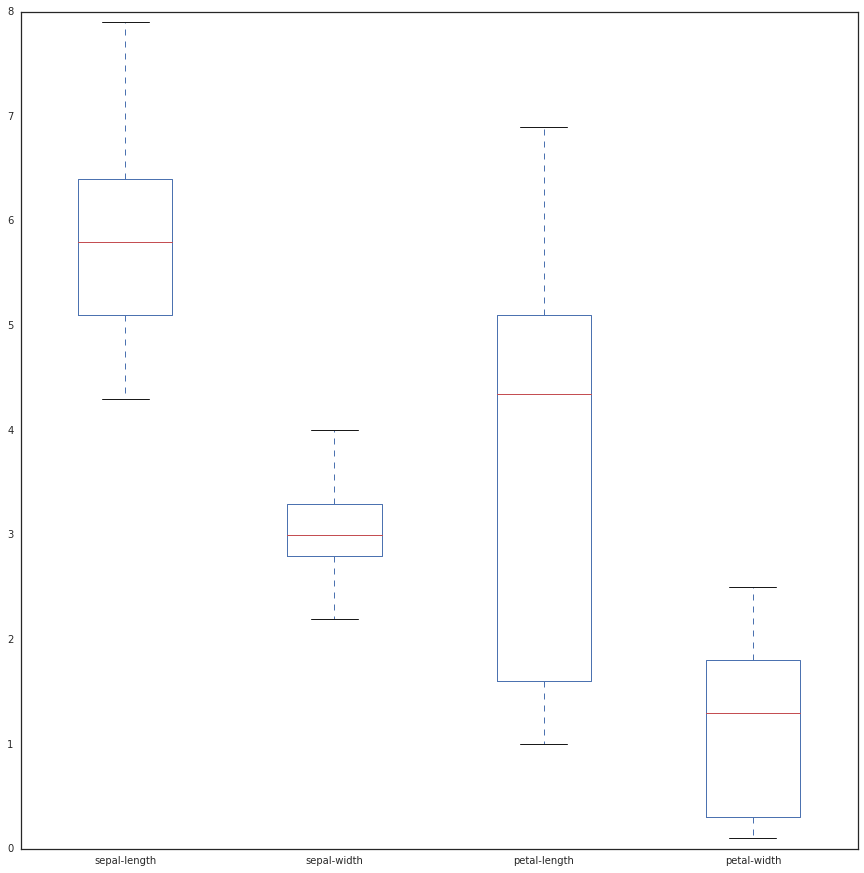

In [138]:
# box and whisker plots
dataset.plot(kind='box', subplots=False, layout=(2,2), sharex=False, sharey=False)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

Interpretation :
 - The boxplot of sepal-width is comparatively small. This shows that sepal-width values are less dispersed. 
 - The boxplot of petal-length is comparatively largely spread. This shows that sepal-width values are highly dispersed.

1. sepal-length boxplot
    The top 25% values are spread over a greater range
    
2. sepal-width boxplot
    The values between 1st and 3rd quartile are spread over a small distance. It means that there are more number of data points between 25% to 75%. This will form a distinct bell-curve.
    
3. petal-length boxplot
    The values between 1st quartile and the median are spread over a greater range.
    
4. petal-width boxplot
    Petal width is comparatively smaller than the other attributes.

We can also create a **histogram** of each input variable to get an idea of the distribution.

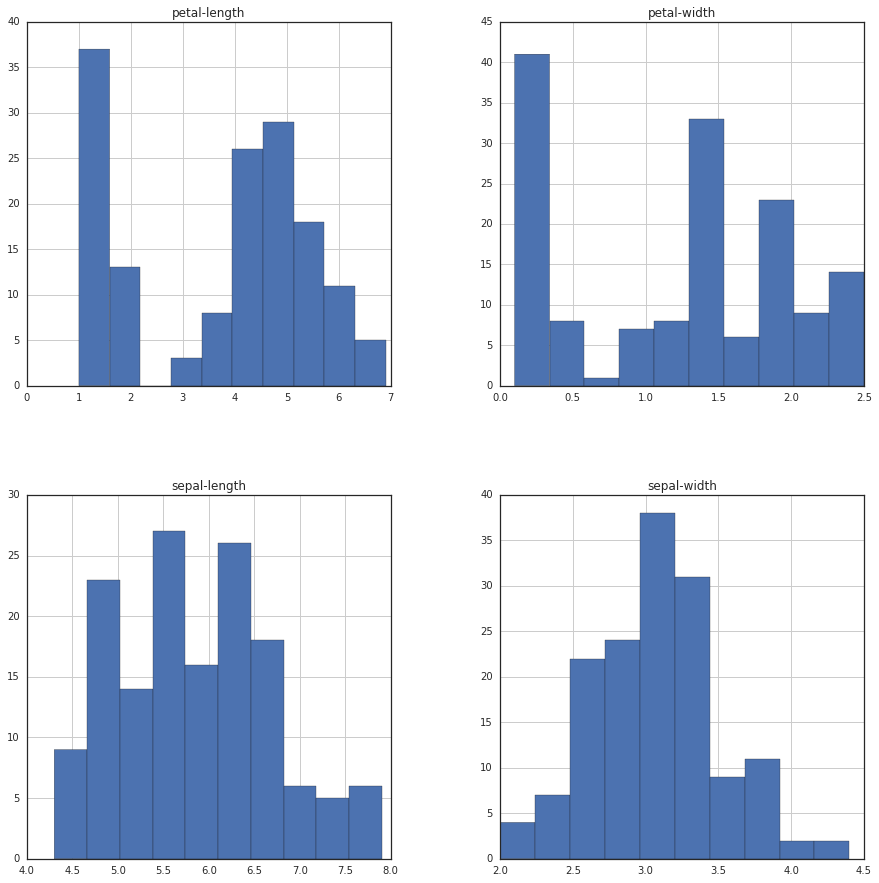

In [125]:
# histograms
dataset.hist()
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

Interpretation : 
- Maximum number of samples have a sepal-width between 3.0 and 3.25
- Maximum number of samples have a sepal-length are in the range of 5.5 and 5.75
- The petal length of maximum number of samples falls in the range of 1 and 1.5
- Maximum number of samples have a petal width between 0 and 0.25

##### 2. Multivariate Plots
Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

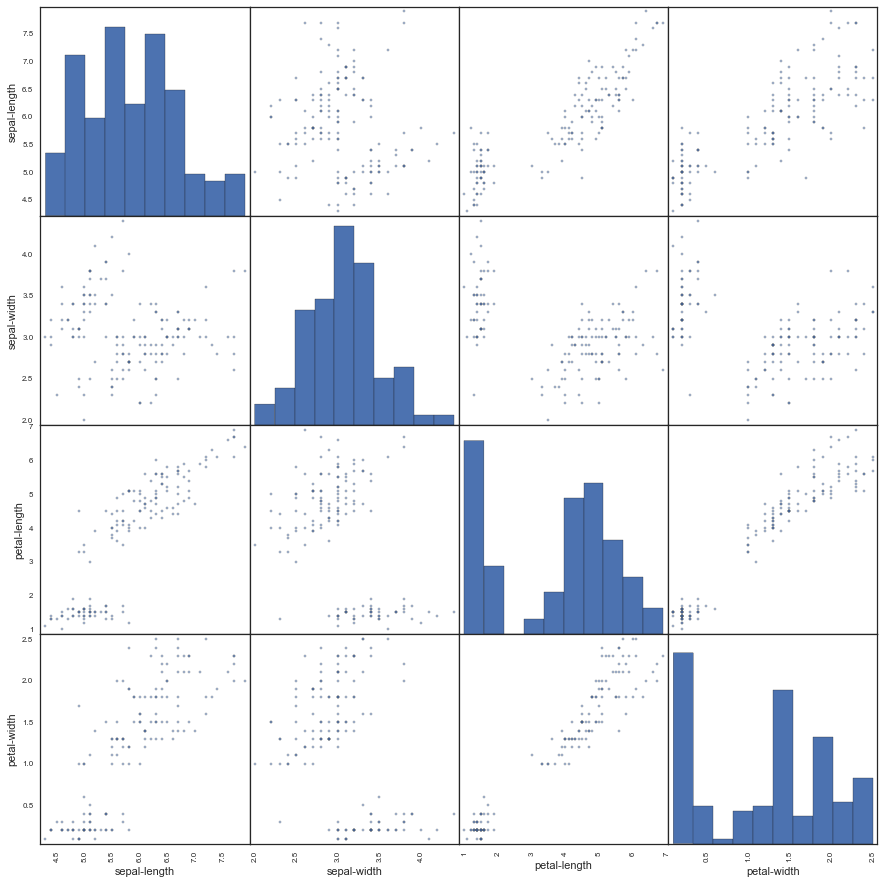

In [124]:
# scatter plot matrix
scatter_matrix(dataset)
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()



One piece of information missing in the plots above is what species each plant is
We'll use seaborn's FacetGrid to color the scatterplot by species.

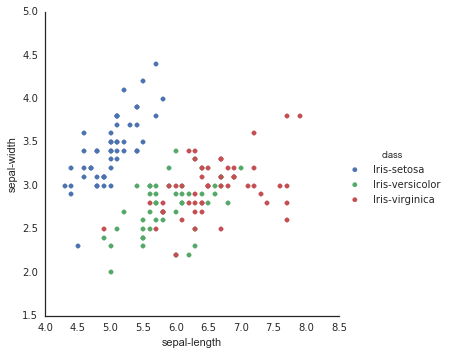

In [139]:
sns.FacetGrid(dataset, hue="class", size=5) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

Similarly, we can create a scatterplot of petal-width vs petal-length as well.

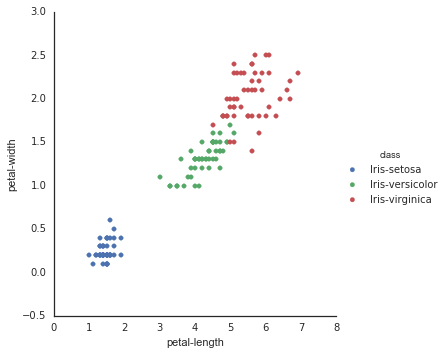

In [140]:
sns.FacetGrid(dataset, hue="class", size=5) \
   .map(plt.scatter, "petal-length", "petal-width") \
   .add_legend()

Interpretation :
- If the sepal-width of a flower is in the range 2.0 and 4.5, and the sepal-length is between 4.0 and 5.0, the class of the flower is most likely to be Iris-setosa
- Flowers with petal-length less than 3.0 and petal-width less than 1.0 belong to Iris-setosa class
- A new flower with petal-length in the range 3.0-5.0 and petal-width in the range 1.0-1.5 will most likely belong to Iris-versicolor class
- A flower with petal length above 5.0 and petal-width above 1.8 will surely belong to Iris-virginica class 






We have successfully completed the interpretation and visualization of the iris dataset.